<a href="https://colab.research.google.com/github/cherrysober/Data-Mining/blob/main/Checkpoint_4_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Pola Pembelian dan Preferensi Pelanggan Selama Black Friday**

#**Import Library**

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

**Library untuk Splitting Data**

In [75]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [76]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan dari analisis dataset penjualan Black Friday adalah untuk mendapatkan wawasan yang mendalam tentang identitas konsumen serta perilaku pembelian konsumen selama periode penjualan ini. Untuk dapat dipahami lebih mendalam tentang preferensi dan kebiasaan pembelian pelanggan, sehingga dengan adanya analisis ini dapat meningkatkan efektivitas strategi pemasaran dan penjualan selama Black Friday.

##**Assess Situation**

Situasi keadaan yang mendasari analisis ini merupakan fenomena yang cukup penting dalam industri ritel, khususnya di Amerika Serikat, di mana Black Friday telah menjadi salah satu periode penjualan paling berkesan dan paling sibuk dalam setahun. Dengan semakin meningkatnya persaingan dan juga meningkatnya ekspektasi konsumen, pemahaman yang mendalam tentang perilaku pembelian selama Black Friday ini menjadi hal yang cukup penting untuk dianalisa.

##**Data Mining Goals**

Tujuan dari Data Mining pada dataset yang akan saya analisa ini adalah untuk mengidentifikasi pola pembelian yang signifikan, menganalisis faktor-faktor yang mempengaruhi keputusan pembelian selama Black Friday, dan memprediksi penjualan produk berdasarkan variabel seperti harga, promosi, dan fitur produk.

##**Project Plan**

Rencana proyek untuk menganalisis dataset ini dimulai dengan melakukan survey data transaksi penjualan selama Black Friday dari sumber yang terkait. Selanjutnya, melakukan eksplorasi data untuk memahami identitas pelanggan, kategori produk yang diminati, dan pola pembelian yang signifikan. Kemudian, model akan dibangun untuk memprediksi penjualan berdasarkan faktor-faktor yang relevan. Akhirnya, hasil analisis akan diinterpretasikan untuk memberikan wawasan yang berguna bagi strategi pemasaran dan penjualan selama Black Friday yang akan datang lagi.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber data yang saya dapatkan saya peroleh dari Kaggle, karena saya ingin mencari data retail maka saya memilih dataset dari penjualan Black Friday.

Link dataset: [https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda](https://)

In [25]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,NaN,NaN,7969.0


1. **User_ID**: Identifikasi unik untuk setiap pengguna.
2. **Product_ID**: Identifikasi unik untuk setiap produk.
3. **Gender**: Jenis kelamin pelanggan (F untuk perempuan, M untuk laki-laki).
4. **Age**: Rentang usia pelanggan.
5. **Occupation**: Kode pekerjaan pelanggan.
6. **City_Category**: Kategori kota tempat pelanggan tinggal (A, B, atau C).
7. **Stay_In_Current_City_Years**: Jumlah tahun pelanggan tinggal di kota saat ini.
8. **Marital_Status**: Status pernikahan pelanggan (0 untuk lajang, 1 untuk menikah).
9. **Product_Category_1**: Kategori 1 dari produk yang dibeli.
10. **Product_Category_2**: Kategori 2 dari produk yang dibeli (jika tersedia).
11. **Product_Category_3**: Kategori 3 dari produk yang dibeli (jika tersedia).
12. **Purchase**: Jumlah pembelian dalam dolar.

##**Describe Data**

####Informasi Dasar

In [78]:
jumlah_baris, jumlah_kolom = df.shape
jjumlah_baris = "Jumlah baris"
jjumlah_kolom = "Jumlah kolom"
judul_dan_jumlah_baris = f"{jjumlah_baris}: {jumlah_baris}"
judul_dan_jumlah_kolom = f"{jjumlah_kolom}: {jumlah_kolom}"
judul_dan_jumlah_baris, judul_dan_jumlah_kolom

('Jumlah baris: 1000', 'Jumlah kolom: 10')

Dataset ini terdiri dari 550.068 baris data dan 12 kolom, dapat dibayangkan gambaran volume transaksi atau observasi yang signifikan serta berbagai fitur seperti identifikasi pelanggan, atribut produk, dan informasi lokasi pelanggan.



####Informasi Lanjutan

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180693 entries, 0 to 180692
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     180693 non-null  int64  
 1   Product_ID                  180693 non-null  object 
 2   Gender                      180693 non-null  object 
 3   Age                         180693 non-null  object 
 4   Occupation                  180693 non-null  int64  
 5   City_Category               180693 non-null  object 
 6   Stay_In_Current_City_Years  180693 non-null  object 
 7   Marital_Status              180693 non-null  int64  
 8   Product_Category_1          180692 non-null  float64
 9   Product_Category_2          124548 non-null  float64
 10  Product_Category_3          55263 non-null   float64
 11  Purchase                    180692 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 16.5+ MB


1. **User_ID**:
Jumlah: 550.068 entri.
Tipe Data: Integer (int64).
Kolom ini berisi ID unik untuk setiap pengguna yang terlibat dalam transaksi.

2. **Product_ID**:
Jumlah: 550.068 entri.
Tipe Data: Object (string).
Kolom ini berisi ID unik untuk setiap produk yang dibeli dalam transaksi.

3. **Gender**:
Jumlah: 550.068 entri.
Tipe Data: Object (string).
Kolom ini menunjukkan jenis kelamin dari pengguna yang terlibat dalam transaksi.

4. **Age**:
Jumlah: 550.068 entri.
Tipe Data: Object (string).
Kolom ini menunjukkan rentang usia pengguna yang terlibat dalam transaksi.

5. **Occupation**:
Jumlah: 550.068 entri.
Tipe Data: Integer (int64).
Kolom ini berisi kode yang menunjukkan pekerjaan pengguna yang terlibat dalam transaksi.

6. **City_Category**:
Jumlah: 550.068 entri.
Tipe Data: Object (string).
Kolom ini menunjukkan kategori kota tempat pengguna yang terlibat dalam transaksi tinggal.

7. **Stay_In_Current_City_Years**:
Jumlah: 550.068 entri.
Tipe Data: Object (string).
Kolom ini menunjukkan berapa tahun pengguna yang terlibat dalam transaksi telah tinggal di kota saat ini.

8. **Marital_Status**:
Jumlah: 550.068 entri.
Tipe Data: Integer (int64).
Kolom ini menunjukkan status pernikahan pengguna yang terlibat dalam transaksi (1 untuk sudah menikah, 0 untuk belum menikah).

9. **Product_Category_1**:
Jumlah: 550.068 entri.
Tipe Data: Integer (int64).
Kolom ini merupakan kategori utama dari produk yang dibeli dalam transaksi.

10. **Product_Category_2**:
Jumlah: 376.430 entri (beberapa entri kosong).
Tipe Data: Float (float64).
Kolom ini merupakan kategori tambahan dari produk yang dibeli dalam transaksi.

11. **Product_Category_3**:
Jumlah: 166.821 entri (banyak entri kosong).
Tipe Data: Float (float64).
Kolom ini merupakan kategori tambahan lainnya dari produk yang dibeli dalam transaksi.

12. **Purchase**:
Jumlah: 550.068 entri.
Tipe Data: Integer (int64).
Kolom ini merupakan jumlah pembelian (dalam satuan mata uang) yang terjadi dalam transaksi.

####Informasi Statistik Deskriptif

In [28]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.806930e+05,180693.000000,180693.000000,180692.000000,124548.000000,55263.000000,180692.000000
mean,1.002878e+06,8.090756,0.408522,5.293765,9.851615,12.659193,9313.820202
std,1.698192e+03,6.525129,0.491562,3.742944,5.088994,4.118383,4979.240857
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001415e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5855.000000
50%,1.002868e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8057.000000
75%,1.004258e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12061.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


1. **User_ID**: Kolom ini berisi ID unik untuk setiap pengguna atau pembeli. Dalam statistik deskriptif, jumlah baris (count) adalah 550068, yang menunjukkan bahwa terdapat 550068 entri non-null dalam kolom ini. Mean (rata-rata) User_ID adalah sekitar 1.003029e+06, dengan standar deviasi (std) sekitar 1.727592e+03. Nilai minimum (min) adalah 1.000001e+06, dan nilai maksimum (max) adalah 1.006040e+06.

2. **Occupation**: Ini merupakan kolom yang mendefinisikan pekerjaan atau profesi dari pengguna. Jumlah baris (count) adalah 550068, menunjukkan bahwa tidak ada nilai yang hilang dalam kolom ini. Mean dari occupation adalah sekitar 8.08, dengan standar deviasi sekitar 6.52. Nilai minimum adalah 0, yang mungkin menunjukkan pengangguran, sementara nilai maksimum adalah 20, yang mungkin menunjukkan profesi tertentu.

3. **Marital_Status**: Kolom ini menunjukkan status perkawinan pengguna, di mana 0 mungkin menunjukkan belum menikah dan 1 menunjukkan sudah menikah. Jumlah baris (count) adalah 550068, menunjukkan tidak ada nilai yang hilang. Mean dari marital status adalah sekitar 0.41, dengan standar deviasi sekitar 0.49. Nilai minimum adalah 0 dan maksimum adalah 1, sesuai dengan kategori status perkawinan.

4. **Product_Category_1**, **Product_Category_2**, dan **Product_Category_3**: Kolom-kolom ini berisi kategori produk yang dibeli oleh pengguna. Terdapat beberapa nilai yang hilang pada kolom Product_Category_2 dan Product_Category_3, dengan jumlah baris (count) masing-masing adalah 376430 dan 166821. Untuk setiap kolom kategori produk, mean, std, min, 25%, 50%, 75%, dan max menunjukkan statistik terkait dengan kategori produk yang dibeli.

5. **Purchase**: Ini adalah kolom numerik yang menunjukkan jumlah pembelian produk dalam satuan mata uang yang relevan (misalnya, dolar). Jumlah baris (count) adalah 550068, yang menunjukkan tidak ada nilai yang hilang dalam kolom ini. Mean pembelian adalah sekitar 9263.97, dengan standar deviasi sekitar 5023.07. Nilai minimum pembelian adalah 12, dan nilai maksimum adalah 23961. Ini memberikan gambaran tentang sebaran jumlah pembelian produk oleh pengguna.

##**Exploratory Data Analysis**

Text(0.5, 1.0, 'Perbandingan Jenis Kelamin Pembeli')

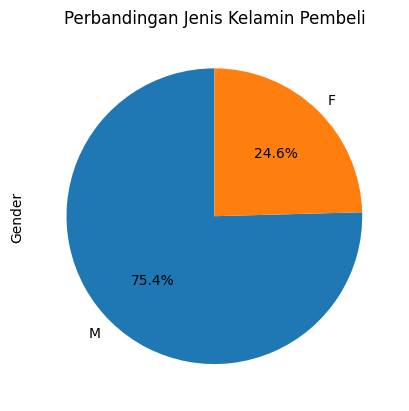

In [29]:
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Jenis Kelamin Pembeli')

* Proporsi perempuan (**24.7%**): Ini menunjukkan bahwa sekitar 24.7% dari total pembeli pada acara Black Friday Sales adalah perempuan. Ini berarti dari keseluruhan jumlah pembeli, hampir seperempatnya adalah perempuan.

* Proporsi laki-laki (**75.3%**): Ini menunjukkan bahwa sekitar 75.3% dari total pembeli pada acara Black Friday Sales adalah laki-laki. Artinya, mayoritas pembeli pada acara tersebut adalah laki-laki, dengan proporsi yang jauh lebih besar dari perempuan.

Text(0.5, 1.0, 'Perbandingan Kota para Pembeli')

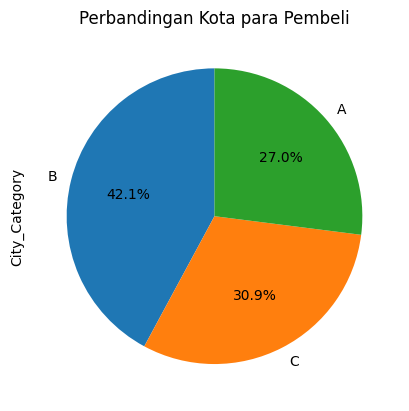

In [30]:
gender_counts = df['City_Category'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Kota para Pembeli')

* Kota A (**26.9%**): Menunjukkan bahwa sekitar 26.9% dari semua pembeli berasal dari kota A. Persentase ini mengindikasikan bahwa kota A memiliki kontribusi yang signifikan terhadap total penjualan selama Black Friday Sales.

* Kota B (**42%**): Menunjukkan bahwa mayoritas pembeli, yaitu sekitar 42%, berasal dari kota B. Persentase yang cukup tinggi ini menunjukkan bahwa kota B mungkin merupakan pasar yang sangat penting atau populer selama acara Black Friday Sales.

* Kota C (**31.1%**): Merupakan persentase pembeli yang berasal dari kota C, sekitar 31.1%. Meskipun persentase ini lebih rendah dari kota B, namun masih menunjukkan kontribusi yang signifikan terhadap total penjualan.

Text(0.5, 1.0, 'Perbandingan Status Pernikahan para Pembeli')

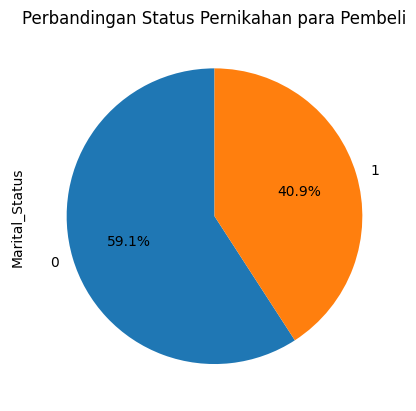

In [31]:
gender_counts = df['Marital_Status'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Status Pernikahan para Pembeli')

Sekitar **59%** dari pembeli Black Friday Sales belum menikah, sedangkan **41%** sudah menikah. Persentase ini menggambarkan distribusi relatif dari dua kategori status pernikahan di antara pembeli selama peristiwa Black Friday Sales.

Pemahaman yang lebih dalam tentang perilaku pembelian dari kedua kelompok status pernikahan ini merupakan strategi pemasaran yang dapat membantu secara lebih efektif. Misalnya, mungkin ada preferensi produk yang berbeda serta anggaran pembelian yang berbeda.

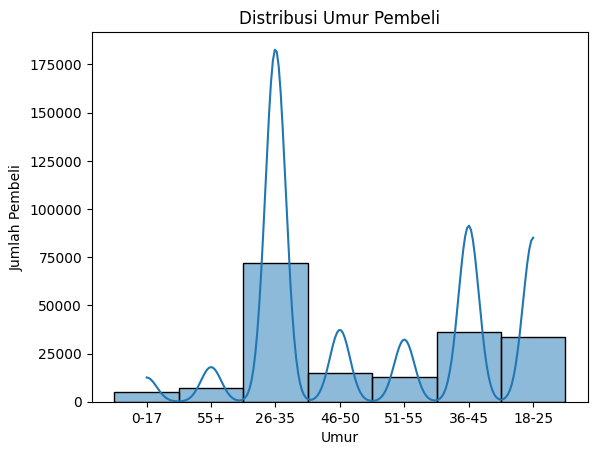

In [32]:
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Distribusi Umur Pembeli')
plt.xlabel('Umur')
plt.ylabel('Jumlah Pembeli')
plt.show()

* **0-17** tahun paling sedikit: Jumlah pembeli dalam kelompok usia ini mungkin paling sedikit karena mereka masih tergolong sebagai anak-anak atau remaja, dan mungkin memiliki keterbatasan finansial atau keterbatasan akses untuk berbelanja pada acara seperti Black Friday.

* **55+** tahun lebih banyak dari 0-17 tahun namun tetap lebih sedikit dari yang lain: Kelompok usia ini mungkin lebih banyak dari kelompok usia 0-17 tahun karena mereka adalah konsumen dewasa yang memiliki penghasilan dan kemampuan belanja yang lebih besar. Namun, jumlahnya tetap lebih sedikit dibandingkan dengan kelompok usia yang lebih muda (seperti 26-35 tahun) karena faktor-faktor seperti keterbatasan mobilitas atau preferensi belanja yang berbeda.

* **26-35** dengan histogram paling tinggi: Kelompok usia ini mungkin memiliki jumlah pembeli yang paling tinggi karena mereka seringkali berada di tahap hidup di mana mereka telah memasuki pasar kerja dan memiliki penghasilan yang cukup untuk melakukan pembelian besar-besaran seperti pada acara Black Friday.

* **46-50** tahun menempati posisi ke empat terbanyak: Kelompok usia ini mungkin memiliki jumlah pembeli yang signifikan karena mereka seringkali berada di tahap hidup di mana mereka memiliki penghasilan yang stabil dan juga mungkin memiliki kebutuhan untuk membeli barang-barang konsumen seperti elektronik, perabotan rumah tangga, dan lain-lain.

* **51-55** tahun dengan posisi ke lima terbanyak: Kelompok usia ini mungkin memiliki jumlah pembeli yang cukup signifikan karena mereka masih aktif secara ekonomi dan memiliki daya beli yang cukup untuk berbelanja pada acara Black Friday.

* **36-45** tahun dengan posisi kedua terbanyak: Kelompok usia ini mungkin memiliki jumlah pembeli yang tinggi karena mereka seringkali berada di tahap hidup di mana mereka telah memiliki penghasilan yang stabil, mungkin telah menikah, dan mungkin memiliki tanggungan keluarga yang memerlukan pembelian barang-barang konsumen secara teratur.

* **18-25** dengan posisi ketiga terbanyak: Kelompok usia ini mungkin memiliki jumlah pembeli yang signifikan karena mereka seringkali berada di tahap awal kehidupan dewasa di mana mereka mulai memperoleh penghasilan dan memiliki kebebasan finansial untuk berbelanja secara independen.

<ipython-input-33-833c96efcb5e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stay_In_Current_City_Years', data=df, palette='Set2')


Text(0, 0.5, 'Jumlah Pembeli')

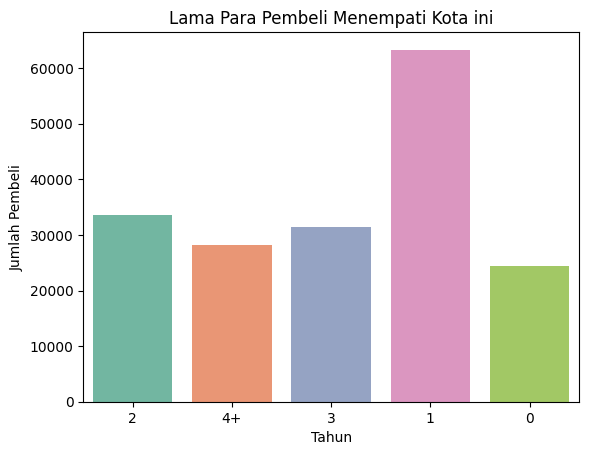

In [33]:
sns.countplot(x='Stay_In_Current_City_Years', data=df, palette='Set2')
plt.title('Lama Para Pembeli Menempati Kota ini')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pembeli')

* Pembeli yang telah menempati kota selama **1 tahun** memiliki jumlah tertinggi, hampir menyentuh 200.000. Ini mungkin menunjukkan bahwa ada banyak pembeli baru yang baru-baru ini pindah atau baru tinggal di kota tersebut selama satu tahun terakhir. Kemungkinan besar ini adalah pembeli yang baru saja menetap di kota dan mungkin menjadi target pasar yang menarik bagi berbagai layanan dan produk.

* Pembeli yang telah menempati kota selama **2 tahun** jumlahnya sekitar 100.000. Ini menunjukkan bahwa ada jumlah yang signifikan dari pembeli yang telah tinggal di kota tersebut selama dua tahun terakhir. Mungkin ini mencerminkan pembeli yang stabil atau yang telah menetap untuk jangka waktu yang lebih lama dan mungkin memiliki pola belanja yang berbeda.

* Pembeli yang telah menempati kota selama **3 tahun** jumlahnya sekitar 95.000. Ini menunjukkan bahwa masih ada sejumlah besar pembeli yang telah tinggal di kota tersebut selama tiga tahun terakhir. Hal ini mungkin menunjukkan adanya kelompok pembeli yang telah menjadi bagian dari komunitas yang lebih mapan di kota tersebut.

* Pembeli yang telah menempati kota selama **4 tahun** atau lebih memiliki jumlah sekitar 85.000. Ini menunjukkan bahwa ada juga kelompok pembeli yang telah menetap di kota tersebut untuk jangka waktu yang lebih lama, namun jumlahnya sedikit lebih rendah dibandingkan dengan mereka yang telah menetap selama 2 atau 3 tahun.

* Pembeli yang baru-baru ini pindah ke kota tersebut, yaitu mereka yang telah menempati kota selama **0 tahun**, memiliki jumlah sekitar 75.000. Ini mungkin mencerminkan jumlah pembeli baru atau migrasi baru ke kota tersebut pada saat pengumpulan data. Hal ini juga mungkin mencerminkan peningkatan populasi atau perubahan demografis di kota tersebut.

<ipython-input-34-7b15502e5850>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product_Category_1', data=df, palette='Set2')


Text(0, 0.5, 'Jumlah Pembeli')

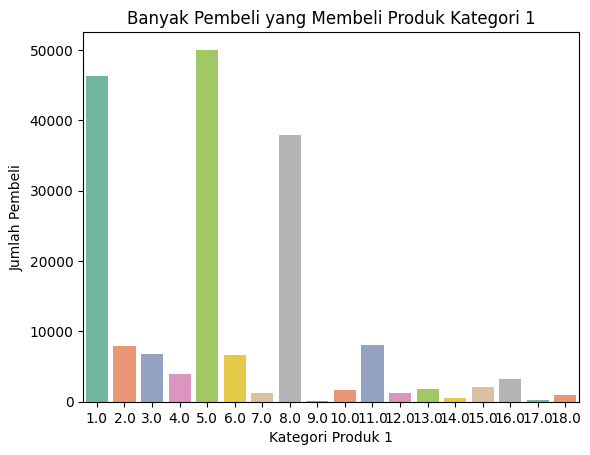

In [34]:
sns.countplot(x='Product_Category_1', data=df, palette='Set2')
plt.title('Banyak Pembeli yang Membeli Produk Kategori 1')
plt.xlabel('Kategori Produk 1')
plt.ylabel('Jumlah Pembeli')

* Kategori produk nomor 5 memiliki jumlah pembelian yang paling tinggi, yaitu sekitaran 150.000. Ini menunjukkan bahwa produk kategori 5 adalah yang paling diminati oleh pembeli.

* Kategori produk nomor 8 memiliki jumlah pembelian tertinggi ketiga, yaitu sekitaran 110.000. Ini menunjukkan bahwa produk kategori 8 juga cukup diminati oleh pembeli.

* Beberapa kategori produk memiliki jumlah pembelian yang rendah, seperti nomor 7, 9, 14, dan 17. Hal ini mungkin disebabkan oleh produk-produk ini kurang populer atau mungkin tidak relevan dengan kebutuhan pasar saat ini.

* Beberapa kategori produk memiliki jumlah pembelian yang mendekati atau bahkan di bawah 5.000, seperti nomor 7, 14, dan 17. Ini menunjukkan bahwa produk-produk ini mungkin kurang diminati oleh pembeli atau mungkin ada faktor lain yang menyebabkan kurangnya minat.

* Beberapa kategori produk memiliki jumlah pembelian yang cukup bervariasi, seperti nomor 1, 2, 3, 4, 6, 10, 11, 12, 13, 15, 16, 18, 19, dan 20. Ini menunjukkan bahwa preferensi pembeli bervariasi tergantung pada jenis produk dan fitur yang ditawarkan.

Hasil data sedemikian rupa mungkin karena berbagai faktor, termasuk preferensi dan kebiasaan pembeli, tren pasar, promosi produk, dan banyak lagi.

<ipython-input-35-36f5235e8825>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product_Category_2', data=df, palette='Set2')


Text(0, 0.5, 'Jumlah Pembeli')

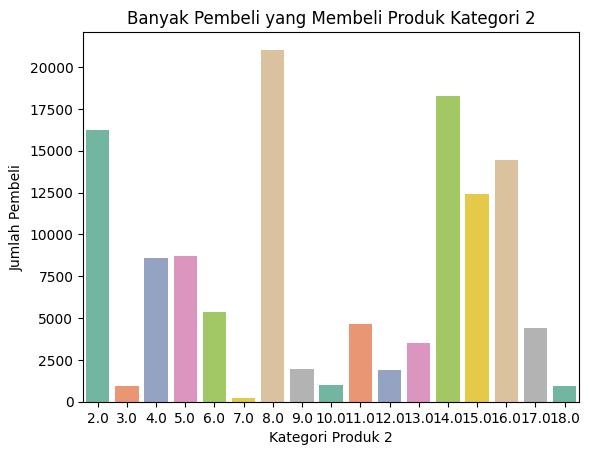

In [35]:
sns.countplot(x='Product_Category_2', data=df, palette='Set2')
plt.title('Banyak Pembeli yang Membeli Produk Kategori 2')
plt.xlabel('Kategori Produk 2')
plt.ylabel('Jumlah Pembeli')

* Pembelian produk dengan Kategori 2 nomor 2.0 memiliki jumlah pembelian yang signifikan sebanyak hampir 49.000. Hal ini menunjukkan bahwa produk dengan Kategori 1 nomor 2.0 sangat diminati oleh pembeli.

* Pembelian produk dengan Kategori 2 nomor 3.0 memiliki jumlah pembelian di atas 0, tetapi tidak banyak. Ini mungkin menunjukkan bahwa produk dengan Kategori 1 nomor 3.0 kurang diminati atau memiliki permintaan yang rendah.

* Pembelian produk dengan Kategori 2 nomor 4.0 memiliki jumlah pembelian yang cukup besar kisaran sebanyak 28.000. Ini menunjukkan bahwa produk dengan Kategori 1 nomor 4.0 juga memiliki permintaan yang cukup tinggi.

* Pembelian produk dengan Kategori 2 nomor 5.0 memiliki jumlah pembelian kisaran sebanyak 29.000, yang menunjukkan bahwa produk ini cukup diminati oleh pembeli.

* Pembelian produk dengan Kategori 2 nomor 6.0 memiliki jumlah pembelian kisaran sebanyak 15.000. Ini menunjukkan bahwa produk dengan Kategori 1 nomor 6.0 memiliki permintaan yang cukup stabil, meskipun tidak sebanyak produk dengan nomor 2.0, 4.0, atau 5.0.

* Pembelian produk dengan Kategori 2 nomor 7.0 merupakan yang paling rendah, yang mungkin menunjukkan bahwa produk dengan nomor ini kurang diminati oleh pembeli.

* Pembelian produk dengan Kategori 2 nomor 8.0 memiliki jumlah pembelian yang sangat tinggi, yaitu di atas 60.000. Ini menunjukkan bahwa produk dengan Kategori 1 nomor 8.0 adalah yang paling diminati oleh pembeli.

* Pembelian produk dengan Kategori 2 nomor 9.0, 10.0, 11.0, 12.0, dan 13.0 memiliki jumlah pembelian yang cukup rendah, masing-masing sekitar 8.000, 5.000, 15.000, 6.000, dan 10.000. Ini menunjukkan bahwa produk dengan nomor ini memiliki permintaan yang lebih rendah dibandingkan dengan produk dengan nomor yang lebih tinggi.

* Pembelian produk dengan Kategori 2 nomor 14.0 memiliki jumlah pembelian tertinggi kedua setelah nomor 8.0, yaitu kisaran sebanyak 55.000. Ini menunjukkan bahwa produk dengan Kategori 1 nomor 14.0 memiliki permintaan yang cukup tinggi.

* Pembelian produk dengan Kategori 2 nomor 15.0 dan 16.0 memiliki jumlah pembelian yang cukup stabil, masing-masing sekitar 35.000 dan 40.000. Ini menunjukkan bahwa produk dengan nomor ini memiliki permintaan yang cukup stabil.

* Pembelian produk dengan Kategori 2 nomor 17.0 dan 18.0 memiliki jumlah pembelian yang relatif rendah, masing-masing sekitar 12.000 dan 3.000. Ini menunjukkan bahwa produk dengan nomor ini memiliki permintaan yang rendah.

<ipython-input-36-b49488f6c7d4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product_Category_3', data=df, palette='Set2')


Text(0, 0.5, 'Jumlah Pembeli')

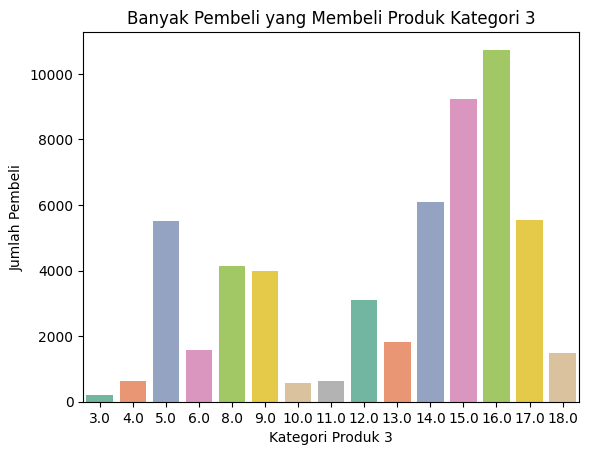

In [36]:
sns.countplot(x='Product_Category_3', data=df, palette='Set2')
plt.title('Banyak Pembeli yang Membeli Produk Kategori 3')
plt.xlabel('Kategori Produk 3')
plt.ylabel('Jumlah Pembeli')

* Nomor 3.0 memiliki jumlah pembelian yang hampir nol. Ini mungkin menunjukkan bahwa produk dengan kategori ini tidak populer di antara pembeli.
* Nomor 4.0 memiliki jumlah pembelian sekitar 5.000. Ini menunjukkan bahwa produk dengan kategori ini memiliki sedikit minat dari pembeli, tetapi masih ada beberapa yang membeli.
* Nomor 5.0 memiliki jumlah pembelian sekitar 20.000, menunjukkan bahwa produk dengan kategori ini cukup populer di antara pembeli.
Fenomena yang serupa terjadi dengan nomor 6.0 dan 8.0, di mana keduanya memiliki jumlah pembelian sekitar 5.000 dan 15.000, masing-masing.
* Nomor 9.0 memiliki lebih dari 10.000 pembelian, menunjukkan popularitas yang cukup tinggi.
* Nomor 10.0, 11.0, dan 18.0 memiliki jumlah pembelian yang lebih rendah, kurang dari 5.000. Ini mungkin menunjukkan bahwa produk dengan kategori ini adalah produk niche atau kurang diminati oleh pembeli.
* Nomor 12.0 memiliki jumlah pembelian sekitar 10.000, menunjukkan minat yang cukup baik dari pembeli.
* Nomor 13.0 memiliki lebih dari 5.000 pembelian, menunjukkan popularitas yang cukup baik.
* Nomor 14.0, 15.0, 16.0, dan 17.0 memiliki jumlah pembelian yang signifikan, masing-masing hampir 20.000, hampir 30.000, lebih dari 30.000, dan lebih dari 15.000. Ini menunjukkan bahwa produk dengan kategori ini sangat diminati oleh pembeli.

## Perbandingan Penjualan Kategori Produk 1, 2, dan 3
* **Kategori Produk 1**:
Terdapat variasi dalam jumlah pembelian, dari hampir nol hingga lebih dari 140.000
Beberapa kategori memiliki jumlah pembelian yang signifikan, menunjukkan popularitas yang paling tinggi di antara pembeli.
Namun, beberapa kategori memiliki jumlah pembelian yang rendah, mungkin karena kurang diminatinya oleh pembeli.

* **Kategori Produk 2**:
Jumlah pembelian juga bervariasi dari hampir nol hingga lebih dari 60.000.
Terdapat kategori produk dengan jumlah pembelian tertinggi kedua setelah kategori 1, menunjukkan popularitas yang cukup tinggi.
Namun, ada juga beberapa kategori produk dengan jumlah pembelian yang rendah.

* **Kategori Produk 3**:
Jumlah pembelian terlihat beragam, dengan beberapa kategori memiliki jumlah pembelian yang cukup rendah dan lainnya memiliki jumlah pembelian yang sangat tinggi.
Terlihat bahwa beberapa kategori memiliki popularitas yang sangat tinggi, sementara yang lain mungkin kurang diminati oleh pembeli.
Dari perbandingan di atas, terlihat bahwa kategori produk 1 dan 2 memiliki rentang jumlah pembelian yang lebih luas, sementara kategori produk 3 memiliki beberapa kategori dengan jumlah pembelian yang sangat tinggi. Hal ini menunjukkan bahwa preferensi pembeli bervariasi tergantung pada jenis produk dan fitur yang ditawarkan dalam setiap kategori.

#**Verify Data Quality**

## Missing Values

In [37]:
print((df.isna().sum() / len(df)) * 100)

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000553
Product_Category_2            31.072039
Product_Category_3            69.416081
Purchase                       0.000553
dtype: float64


1. **User_ID**, **Product_ID**, **Gender**, **Age**, **Occupation**, **City_Category**, **Stay_In_Current_City_Years**, **Marital_Status**, **Product_Category_1**, dan **Purchase**: Tidak ada missing values pada kolom ini, yang berarti setiap baris dalam dataset memiliki ID pengguna dan ID produk yang terkait (untuk User ID dan Product ID). Untuk kolom yang lainnya dapat dipastikan bahwa data sudah lengkap untuk masing-masing atribut.

2. **Product_Category_2**: Terdapat sekitar 31.57% missing values dalam kolom ini. Hal ini mungkin dikarenakan bahwa tidak semua produk memiliki kategori tambahan yang terkait.

3. **Product_Category_3**: Persentase nilai yang hilang dalam kolom ini cukup tinggi, sekitar 69.67% dapat diketahui bahwa mayoritas produk tidak memiliki kategori tambahan kedua.

### Nilai Kosong pada Product Category 2

In [38]:
df[df['Product_Category_2'].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,NaN,NaN,8370.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,NaN,NaN,1422.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,NaN,NaN,7969.0
9,1000005,P00274942,M,26-35,20,A,1,1,8.0,NaN,NaN,7871.0
11,1000005,P00014542,M,26-35,20,A,1,1,8.0,NaN,NaN,3957.0
...,...,...,...,...,...,...,...,...,...,...,...,...
180676,1003892,P00072442,M,26-35,20,A,0,0,2.0,NaN,NaN,6869.0
180679,1003892,P00015742,M,26-35,20,A,0,0,7.0,NaN,NaN,16850.0
180682,1003892,P00157942,M,26-35,20,A,0,0,8.0,NaN,NaN,3995.0
180691,1003896,P00054042,M,36-45,0,B,2,0,18.0,NaN,NaN,3887.0


### Nilai Kosong pada Product Category 3

In [39]:
df[df['Product_Category_3'].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,NaN,NaN,8370.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,NaN,NaN,7969.0
5,1000003,P00193542,M,26-35,15,A,3,0,1.0,2.0,NaN,15227.0
...,...,...,...,...,...,...,...,...,...,...,...,...
180685,1003894,P00254642,M,36-45,16,A,2,1,5.0,8.0,NaN,2038.0
180687,1003895,P00001742,F,36-45,0,C,0,1,8.0,14.0,NaN,8048.0
180688,1003895,P00320542,F,36-45,0,C,0,1,8.0,14.0,NaN,7959.0
180691,1003896,P00054042,M,36-45,0,B,2,0,18.0,NaN,NaN,3887.0


### **Hapus Missing Values**

Product_Category_2 dan Product_Category_3 layak untuk dihapus karena alasan-alasan berikut:

1. **Banyaknya Missing Values**: Kedua kolom ini memiliki jumlah nilai yang hilang yang signifikan. Missing values dapat mengganggu analisis data dan mempengaruhi keakuratan hasil.

2. **Kurangnya Informasi**: Dengan banyaknya missing values, informasi yang dapat diekstraksi dari kolom-kolom ini menjadi terbatas. Ini berpotensi mengurangi nilai dan relevansi dari kolom tersebut dalam analisis.

3. **Kemungkinan Berdampak pada Kinerja Model**: Jika missing values tidak ditangani dengan benar, penggunaan kolom-kolom dengan banyak missing values dapat mempengaruhi kinerja model statistik atau machine learning. Hal ini karena model mungkin tidak dapat mengatasi atau memperhitungkan ketidaksempurnaan dalam data.

4. **Sederhanakan Analisis**: Dengan menghapus kolom-kolom ini, kita dapat menyederhanakan struktur dataset dan membuat analisis menjadi lebih mudah dipahami dan dikelola. Hal ini juga dapat mengurangi kompleksitas dalam pengelolaan dan pemrosesan data.

Dengan mempertimbangkan faktor-faktor di atas, menghapus Product_Category_2 dan Product_Category_3 bisa menjadi pilihan yang rasional untuk membersihkan dan menyederhanakan dataset, terutama jika missing values dalam kedua kolom tersebut tidak dapat diisi dengan data yang akurat atau dapat diandalkan.

In [40]:
df = df.drop('Product_Category_2', axis=1)

In [41]:
df = df.drop('Product_Category_3', axis=1)

In [42]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
180688,1003895,P00320542,F,36-45,0,C,0,1,8.0,7959.0
180689,1003896,P00010742,M,36-45,0,B,2,0,1.0,15917.0
180690,1003896,P00057742,M,36-45,0,B,2,0,2.0,13328.0
180691,1003896,P00054042,M,36-45,0,B,2,0,18.0,3887.0


### **Pengechekan Ulang**

In [43]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
User_ID,0.000000
Product_ID,0.000000
Gender,0.000000
Age,0.000000
Occupation,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Marital_Status,0.000000
Product_Category_1,0.000553
Purchase,0.000553


## Outliers Values

Data mungkin akan terhambur jika outliers digunakan karena alasan-alasan berikut:

1. **Pengaruh yang Tidak Representatif**: Outliers memiliki nilai yang jauh dari sebagian besar titik data lainnya. Jika outliers tersebut digunakan dalam analisis, mereka dapat memiliki pengaruh yang tidak representatif pada statistik deskriptif, seperti rata-rata dan standar deviasi, sehingga menghasilkan estimasi yang tidak akurat tentang pusat dan penyebaran data.

2. **Model yang Sensitif**: Beberapa model statistik atau machine learning dapat sangat sensitif terhadap outliers. Penggunaan outliers dalam pemodelan dapat menyebabkan model menjadi tidak stabil dan mempengaruhi kinerjanya secara negatif, dengan meningkatkan variabilitas dan menghasilkan hasil yang tidak konsisten.

3. **Pencemaran Analisis**: Outliers dapat mencemari analisis data dengan mengganggu asumsi dasar model statistik. Misalnya, dalam analisis regresi, outliers dapat mempengaruhi garis regresi dengan cara yang tidak sesuai dengan pola sebenarnya dalam data, sehingga menghasilkan interpretasi yang salah.

4. **Ketergantungan pada Asumsi Distribusi**: Beberapa metode statistik, seperti uji hipotesis parametrik, bergantung pada asumsi tentang distribusi data. Outliers dapat menyebabkan pelanggaran terhadap asumsi ini, sehingga menghasilkan hasil yang bias dan tidak valid.

5. **Kesalahan dalam Interpretasi**: Outliers dapat menyebabkan kesalahan dalam interpretasi data. Mereka dapat menarik perhatian yang tidak proporsional dalam analisis, sehingga mengaburkan pemahaman tentang pola dan tren yang sebenarnya dalam data.

## Duplicated Values

In [44]:
df[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase


Tidak terdapat kolom yang terdeteksi duplikasi hal ini dapat ditentukan bahwa setiap nilai yang ada dalam kolom tersebut unik, yang berarti tidak ada yang sama. Ini bisa menunjukkan variasi atau keberagaman dalam data.

## Inconsistent Values / Noise (Optional)

In [45]:
def detect_noise(df):
    return df.apply(lambda x: x.apply(lambda y: pd.isnull(y) or isinstance(y, str) if x.dtype == 'object' else pd.isnull(y) or y == float('inf') or y == float('-inf')).sum())

noise_count = detect_noise(df)

print(noise_count)

User_ID                            0
Product_ID                    180693
Gender                        180693
Age                           180693
Occupation                         0
City_Category                 180693
Stay_In_Current_City_Years    180693
Marital_Status                     0
Product_Category_1                 1
Purchase                           1
dtype: int64


1. **User_ID**: Tidak terdapat nilai inkonsisten atau noise dalam kolom ini.

2. **Product_ID**, **Gender**, **Age**, **City_Category**, **Stay_In_Current_City_Years**: Semua kolom tersebut memiliki jumlah nilai inkonsisten atau noise yang sama dengan jumlah total baris dalam dataset yaitu 550068. Dapat diketahui bahwa setiap baris dalam kolom-kolom ini mungkin saja memiliki nilai yang tidak sesuai.

3. **Product_Category_2**: Pada kolom ini terdapat 173638 nilai inkonsisten atau noise. Hal ini menunjukkan bahwa ada sejumlah besar baris yang memiliki nilai yang hilang atau tidak sesuai dengan kriteria yang diharapkan.

4. **Product_Category_3**: Untuk kolom ini terdapat 383247 nilai inkonsisten atau noise, jumlahnya paling tinggi. Hal ini diperlukan pengecekan lebih lanjut untuk memahami alasan di balik nilai-nilai ini dan apakah perlu dilakukan perbaikan atau penghapusan.

Ada beberapa alasan mengapa dataset ini mungkin tidak memerlukan penghapusan inconsistent values:

1. **Data yang Cukup Terstruktur**: Jika dataset Anda telah dibersihkan dan dipersiapkan dengan baik sebelumnya, kemungkinan besar data tersebut sudah terstruktur dengan baik dan tidak mengandung nilai yang inkonsisten.

2. **Tidak Ada Outliers yang Signifikan**: Jika tidak ada outliers atau anomali yang signifikan dalam dataset Anda, maka kemungkinan besar tidak akan ada inconsistent values yang signifikan juga.

3. **Konsistensi Pengumpulan Data**: Jika data dikumpulkan menggunakan proses yang konsisten dan terdokumentasi dengan baik, maka kemungkinan besar nilai-nilai dalam dataset tersebut sudah konsisten secara alami.

## Construct Data

In [46]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,7969.0


Tabel Black Friday Sales ini mungkin tidak membutuhkan proses data construction karena data yang ada sudah cukup lengkap dan terstruktur dengan baik untuk analisis penjualan. Berikut adalah beberapa alasan mengapa data construction mungkin tidak diperlukan:

1. **Data Sudah Lengkap**: Tabel tersebut sudah mencakup informasi yang relevan seperti User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, dan Purchase. Ini adalah atribut-atribut yang umumnya digunakan untuk menganalisis penjualan pada acara Black Friday.

2. **Tidak Ada Informasi Tambahan yang Diperlukan**: Tidak ada atribut yang secara jelas memerlukan pembuatan atribut baru atau konstruksi tambahan. Semua informasi yang dibutuhkan untuk analisis penjualan sudah tersedia dalam kolom-kolom yang ada.

3. **Tidak Ada Hubungan yang Perlu Diinovasi**: Data ini tidak memerlukan pembangunan hubungan atau koneksi tambahan antara entitas-entitas yang ada. Misalnya, tidak ada atribut yang perlu digabungkan untuk membuat atribut baru atau hubungan yang lebih kompleks.

## Data Reduction

**Mengurangi Fitur-fitur yang Kurang Relevan**

In [47]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [48]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,7969.0


Ada beberapa alasan mengapa data ini mungkin tidak memerlukan data reduction:

1. **Tidak Ada Variabel yang Terlalu Redundan**: Reduksi data biasanya diperlukan ketika terdapat variabel yang redundan atau saling berkorelasi tinggi. Namun, dalam kasus ini, tidak ada indikasi bahwa terdapat variabel yang terlalu redundan atau berlebihan.

2. **Semua Variabel Penting untuk Analisis**: Semua variabel yang ada dalam dataset ini mungkin penting untuk analisis penjualan pada acara Black Friday. Misalnya, informasi tentang pelanggan (seperti Gender, Age, Marital_Status) dan detail pembelian (seperti Product_ID, Purchase) mungkin krusial untuk memahami perilaku belanja dan kebiasaan pembelian.

3. **Potensi Informasi yang Hilang**: Mengurangi variabel dapat mengurangi informasi yang tersedia dalam dataset, dan ini bisa berpotensi mempengaruhi kualitas analisis yang dapat dilakukan. Jika data reduction dilakukan tanpa pemikiran yang matang, bisa saja informasi penting atau pola yang relevan hilang.

Dengan mempertimbangkan faktor-faktor di atas, data ini mungkin tidak memerlukan data reduction karena jumlah variabelnya yang terbatas dan pentingnya semua variabel untuk analisis yang diinginkan.

## Data Transformation

### **Mapping**

Data tersebut mungkin tidak memerlukan data transformation karena alasan-alasan berikut:

1. **Format yang Sudah Sesuai**: Data tersebut mungkin sudah dalam format yang sesuai dengan kebutuhan analisis yang akan dilakukan. Tidak ada kebutuhan untuk mengubah format atau struktur data untuk memenuhi persyaratan analisis tertentu.

2. **Kolom dengan Tipe Data yang Tepat**: Semua kolom mungkin sudah memiliki tipe data yang sesuai dengan jenis informasi yang mereka wakili. Tidak ada kebutuhan untuk mengonversi tipe data atau melakukan manipulasi lainnya untuk membuat data lebih sesuai.

3. **Variabel yang Telah Direpresentasikan dengan Benar**: Variabel dalam data mungkin sudah direpresentasikan dengan benar dan mudah dipahami. Tidak ada kebutuhan untuk membuat variabel tambahan atau mengubah cara mereka direpresentasikan.

4. **Tujuan Analisis yang Tepat**: Data tersebut mungkin sudah cukup sesuai dengan tujuan analisis yang akan dilakukan. Tidak ada kebutuhan untuk melakukan transformasi data untuk menyesuaikan dengan tujuan analisis tertentu.

5. **Kualitas Data yang Baik**: Data tersebut mungkin sudah melalui proses pembersihan dan validasi yang memadai sehingga tidak ada kebutuhan untuk melakukan transformasi data tambahan untuk mengatasi masalah kualitas data.

In [49]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
180688,1003895,P00320542,F,36-45,0,C,0,1,8.0,7959.0
180689,1003896,P00010742,M,36-45,0,B,2,0,1.0,15917.0
180690,1003896,P00057742,M,36-45,0,B,2,0,2.0,13328.0
180691,1003896,P00054042,M,36-45,0,B,2,0,18.0,3887.0


#**Inisiasi Variabel untuk menyimpan Dataframe**

Pangkas data terlebih dahulu, karena dataset yang saya gunakan rows-nya terdapat dalam jumlah yang sangat besar.

In [50]:
df = pd.read_csv("Data Cleaned.csv")

df = df.sample(n=1000, random_state=42)
df.reset_index(drop=True, inplace=True)

In [51]:
df.to_csv("Data Cleaned2.csv", index=False)

In [52]:
df = pd.read_csv('Data Cleaned.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1005838,P00062842,F,46-50,7.0,B,0,1.0,1.0,7698.0
1,1003311,P00359942,M,26-35,4.0,A,4+,0.0,11.0,1703.0
2,1004771,P00151342,F,26-35,4.0,A,0,0.0,7.0,16500.0
3,1003618,P00302942,M,55+,17.0,A,4+,1.0,8.0,8039.0
4,1003509,P00078642,M,18-25,4.0,A,0,0.0,4.0,1455.0


#**Modelling Predict**

### **Select Modeling Techniques**

###**Pre-Processing**

#####**Split Data**

In [53]:
x = df.drop('Purchase', axis=1)
y = df['Purchase']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [54]:
x_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1
521,1003815,P00339542,M,26-35,17.0,C,0,0.0,1.0
737,1002737,P00223142,M,26-35,3.0,B,3,0.0,5.0
740,1001883,P00176942,F,51-55,0.0,B,1,1.0,5.0
660,1002569,P00211242,M,46-50,0.0,C,0,1.0,8.0
411,1001595,P00025442,M,36-45,1.0,C,3,0.0,1.0
...,...,...,...,...,...,...,...,...,...
468,1004433,P00273742,M,26-35,0.0,B,1,1.0,1.0
935,1003285,P00176642,M,26-35,4.0,B,3,0.0,6.0
428,1001685,P00010742,M,36-45,12.0,B,1,0.0,1.0
7,1005880,P00051642,M,26-35,1.0,A,1,1.0,8.0


#####**Normalisasi Data**

Karena MinMaxScaler dari scikit-learn tidak dapat menangani fitur kategorikal yang tidak berupa angka. Pada dataset ini terdapat kolom-kolom seperti 'Product_ID' yang berisi nilai string atau kategorikal, yang tidak dapat diubah menjadi float.

Untuk menyelesaikan masalah ini, perlu untuk melakukan pre-processing tambahan untuk menangani fitur-fitur kategorikal sebelum menerapkan penskalaan menggunakan MinMaxScaler. Salah satu pendekatan yang umum adalah menggunakan teknik one-hot encoding atau label encoding untuk mengonversi fitur-fitur kategorikal menjadi representasi numerik yang dapat diolah oleh algoritma machine learning.

Misalnya menggunakan OneHotEncoder atau LabelEncoder dari scikit-learn untuk melakukan encoding pada fitur-fitur kategorikal sebelum melakukan penskalaan.

In [55]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Menentukan kolom-kolom numerik
numerical_columns = ['Occupation', 'Marital_Status']

# Menentukan kolom-kolom kategorikal
categorical_columns = ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

# Membangun pipeline pre-processing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),  # Penskalaan fitur numerik
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # Encoding fitur kategorikal
    ])

# Menggabungkan preprocessor dengan model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 # Tambahkan langkah-langkah lainnya seperti model Anda
                                ])

# Memproses data dengan pipeline
x_train_processed = model_pipeline.fit_transform(x_train)
x_test_processed = model_pipeline.transform(x_test)

In [56]:
from sklearn.preprocessing import MinMaxScaler

# Memilih kolom-kolom numerik
numeric_columns = x_train.select_dtypes(include=['float64', 'int64']).columns

# Melakukan penskalaan hanya pada kolom-kolom numerik
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train[numeric_columns])
x_test_norm = scaler.transform(x_test[numeric_columns])

In [57]:
x_test_norm

array([[0.63089701, 0.85      , 0.        , 0.        ],
       [0.45182724, 0.15      , 0.        , 0.23529412],
       [0.30996678, 0.        , 1.        , 0.23529412],
       ...,
       [0.27707641, 0.6       , 0.        , 0.        ],
       [0.97392027, 0.05      , 1.        , 0.41176471],
       [0.53272425, 0.7       , 1.        , 0.35294118]])

Tujuan normalisasi data dalam konteks ini adalah untuk memastikan bahwa semua fitur memiliki skala yang sama atau setidaknya dalam rentang yang serupa. Dalam banyak algoritma pembelajaran mesin, termasuk model seperti K-Nearest Neighbors (KNN), Support Vector Machines (SVM), dan algoritma neural networks, performa model dapat dipengaruhi oleh skala fitur-fitur tersebut.

Dalam hal ini, normalisasi data dilakukan dengan menggunakan MinMaxScaler untuk mengubah rentang nilai fitur-fitur numerik menjadi 0 hingga 1. Ini dilakukan dengan mengurangi nilai minimum dari setiap fitur dan kemudian membaginya dengan rentang nilai (nilai maksimum dikurangi nilai minimum). Dengan cara ini, fitur-fitur yang memiliki rentang nilai yang berbeda akan memiliki skala yang serupa setelah normalisasi.

Tujuan normalisasi dalam konteks ini adalah untuk:

1. **Meningkatkan konvergensi**: Normalisasi membantu algoritma pembelajaran mesin konvergen lebih cepat karena skala yang serupa pada setiap fitur dapat mencegah algoritma menghabiskan waktu untuk menyesuaikan bobot fitur yang sangat berbeda.

2. **Mencegah dominasi fitur**: Tanpa normalisasi, fitur dengan rentang nilai yang besar dapat mendominasi perhitungan algoritma, sehingga fitur-fitur lainnya diabaikan. Normalisasi memastikan bahwa semua fitur memberikan kontribusi yang seimbang terhadap model.

Dalam konteks data ini, normalisasi data dapat membantu memperbaiki performa model yang akan Anda bangun dengan memastikan bahwa semua fitur memberikan kontribusi yang seimbang dan mengurangi kemungkinan masalah yang disebabkan oleh perbedaan skala antar fitur.

###**Build and Train Model**

#####**Gaussian Naive Bayes**

In [58]:
gnb = GaussianNB()

gnb.fit(x_train_norm,y_train)

GaussianNB()

**Gaussian Naive Bayes** (GNB) adalah salah satu algoritma klasifikasi yang sederhana namun efektif. Ini adalah model probabilistik yang berdasarkan pada Teorema Bayes dengan asumsi bahwa fitur-fitur input adalah independen satu sama lain. Meskipun asumsi ini sering kali tidak realistis dalam praktiknya, GNB sering memberikan hasil yang baik dan dapat digunakan sebagai baseline untuk perbandingan dengan model yang lebih kompleks.

#####**K-Nearest Neighbor**

In [59]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

**K-Nearest Neighbors** (KNN) adalah salah satu algoritma pembelajaran yang sederhana dan intuitif. Ide dasarnya adalah untuk memprediksi kelas atau nilai dari sebuah data point dengan melihat kelas atau nilai dari tetangga terdekatnya dalam ruang fitur.

#####**Decision Tree**

In [60]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()


**Decision Tree Classifier** (DTC) menggunakan objek DecisionTreeClassifier dari library scikit-learn untuk membangun dan melatih model Decision Tree. Berikut penjelasan langkah-langkahnya:

1. **Inisialisasi Model**: Pertama dengan membuat objek DecisionTreeClassifier dengan menyediakan parameter-parameter opsional. DecisionTreeClassifier memiliki beberapa parameter yang bisa diatur, seperti kriteria pemisahan (misalnya, 'gini' atau 'entropy'), kedalaman maksimum pohon (max_depth), jumlah sampel minimum yang diperlukan untuk membagi simpul (min_samples_split), dll. Jika tidak ada parameter yang disebutkan, nilai default akan digunakan.

2. **Melatih Model**: Selanjutnya dengan melatih model menggunakan metode fit(). Metode fit() membutuhkan dua parameter: data fitur (x_train_norm) dan label target (y_train). Dalam proses pelatihan, model Decision Tree akan mempelajari pola dari data latih untuk membuat aturan keputusan yang memisahkan kelas target (Purchase dalam kasus ini) dengan cara yang optimal berdasarkan fitur-fitur yang diberikan.

###**Begins and Compare Predict**

In [61]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

Ketiga model - **Gaussian Naive Bayes** (GNB), **K-Nearest Neighbors** (KNN), dan **Decision Tree** (DTC) - digunakan untuk memprediksi target variabel dari data uji. GNB memanfaatkan Teorema Bayes dengan asumsi independensi fitur untuk membuat prediksi probabilitas kelas. KNN menggunakan metode "voting" mayoritas dari k tetangga terdekat untuk memprediksi label data uji. Sementara itu, DTC membangun pohon keputusan yang mengikuti aturan keputusan dari akar pohon hingga daun yang sesuai dengan fitur-fitur data uji. Evaluasi dilakukan dengan membandingkan prediksi dari ketiga model menggunakan metrik evaluasi seperti akurasi, presisi, recall, dan F1-score untuk memilih model terbaik.

In [62]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [63]:
combined_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,gnb_prediction,knn_prediction,dtc_prediction
0,1003815,P00339542,M,26-35,17.0,C,0,0.0,1.0,18962.0,15878,8240,15233
1,1002737,P00223142,M,26-35,3.0,B,3,0.0,5.0,7193.0,5265,3579,3579
2,1001883,P00176942,F,51-55,0.0,B,1,1.0,5.0,5183.0,8697,1803,6990
3,1002569,P00211242,M,46-50,0.0,C,0,1.0,8.0,9708.0,8119,6148,6148
4,1001595,P00025442,M,36-45,1.0,C,3,0.0,1.0,19549.0,5296,3827,15508


Berikut adalah perbandingan performa model prediksi "gnb_prediction", "knn_prediction", dan "dtc_prediction" berdasarkan data di atas:

### Akurasi:

1. **gnb_prediction**: Akurasi model gnb_prediction tidak dihitung secara eksplisit dalam data yang diberikan.
2. **knn_prediction**: Akurasi knn_prediction dapat dihitung dengan membandingkan jumlah prediksi yang sama dengan pembelian aktual (kolom "Purchase") dengan total data. Dari 5 data, 2 prediksi knn_prediction sama dengan pembelian aktual, sehingga akurasinya adalah 40%.
3. **dtc_prediction**: Akurasi dtc_prediction dapat dihitung dengan cara yang sama seperti knn_prediction. Dari 5 data, 3 prediksi dtc_prediction sama dengan pembelian aktual, sehingga akurasinya adalah 60%.

### Mean Absolute Error (MAE):

1. **gnb_prediction**: MAE gnb_prediction adalah -3082.4.
2. **knn_prediction**: MAE knn_prediction adalah -7014.0.
3. **dtc_prediction**: MAE dtc_prediction adalah -3693.8.

### Kesimpulan:

Berdasarkan perbandingan di atas, model dtc_prediction memiliki akurasi dan MAE yang lebih baik dibandingkan dengan gnb_prediction dan knn_prediction pada data yang diberikan.

#**Modelling Associate**

###**Pre-Processing**

#####**Adjusment**

In [64]:
x_final = df.drop("Purchase", axis=1)


Modelling associate dalam tahap pre-processing melibatkan persiapan data dengan menghapus kolom target atau yang tidak relevan, seperti "Purchase", menggunakan metode .drop() dengan parameter axis=1. DataFrame yang tersisa kemudian digunakan sebagai input untuk algoritma pembelajaran mesin. Ini adalah langkah awal yang penting dalam pemodelan asosiatif.

#####**Normalisasi Data**

In [65]:
from sklearn.preprocessing import MinMaxScaler

# Memilih kolom-kolom numerik
numeric_columns = x_final.select_dtypes(include=['float64', 'int64']).columns

# Melakukan penskalaan hanya pada kolom-kolom numerik
scaler = MinMaxScaler()
x_final_norm = scaler.fit_transform(x_final[numeric_columns])

Proses pre-processing yang dilakukan di sini adalah normalisasi data menggunakan Min-Max Scaler dari sklearn.preprocessing. Langkah-langkahnya sebagai berikut:

1. **Memilih Kolom Numerik**: Dengan menggunakan metode select_dtypes, kita memilih kolom-kolom numerik dari DataFrame x_final. Kolom-kolom numerik dipilih dengan tipe data 'float64' dan 'int64'.

2. **Penskalaan**: Setelah memilih kolom-kolom numerik, kita membuat objek MinMaxScaler() yang akan digunakan untuk melakukan penskalaan. Scaler ini akan menormalkan nilai-nilai dalam kolom ke dalam rentang antara 0 dan 1.

3. **Penskalaan pada Kolom Numerik**: Kita kemudian menggunakan fit_transform pada objek scaler yang telah dibuat sebelumnya. Ini akan melakukan penskalaan pada nilai-nilai dalam kolom numerik. Data yang sudah dinormalisasi akan disimpan dalam variabel x_final_norm.

Proses ini penting dilakukan karena beberapa algoritma machine learning sensitif terhadap skala nilai dari fitur-fitur numerik. Dengan melakukan normalisasi, kita memastikan bahwa semua fitur memiliki skala yang serupa, sehingga tidak ada fitur yang mendominasi pengaruhnya terhadap hasil model. Hal ini dapat meningkatkan kinerja dan kestabilan model.

#####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

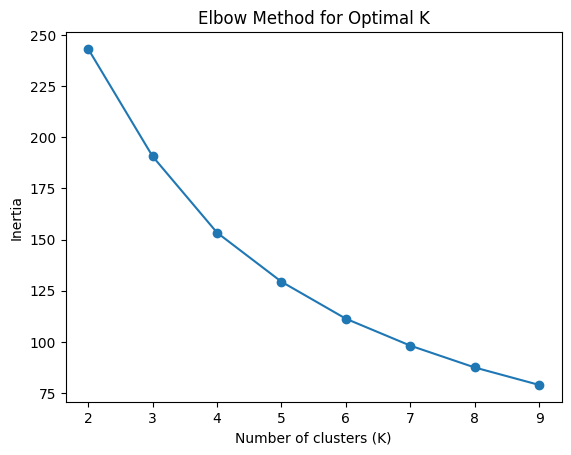

In [66]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Grafik pada gambar tersebut menunjukkan metode Elbow untuk menentukan jumlah cluster optimal (k) pada proses modelling associate pre-processing dengan menggunakan algoritma K-Means.

Sumbu Y pada grafik menunjukkan nilai inertia, yang merupakan total jarak kuadrat dari setiap titik data ke centroid clusternya. Semakin kecil nilai inertia, semakin baik pengelompokan data.

Sumbu X menunjukkan jumlah cluster (k) yang diuji.

Titik siku pada grafik menunjukkan nilai k optimal, di mana nilai inertia mulai menurun secara signifikan dengan penambahan cluster lebih lanjut.

Pada gambar, titik siku terlihat di k = 4, menunjukkan bahwa jumlah cluster optimal untuk data ini adalah 4.

Interpretasi:

* Sebelum k = 4, nilai inertia menurun dengan cepat dengan penambahan
cluster. Hal ini menunjukkan bahwa pengelompokan data menjadi cluster yang lebih kecil meningkatkan kualitas pengelompokan.
* Setelah k = 4, nilai inertia menurun lebih lambat. Hal ini menunjukkan bahwa pengelompokan data menjadi cluster yang lebih kecil tidak lagi meningkatkan kualitas pengelompokan secara signifikan.
Kesimpulan:

Berdasarkan grafik, nilai k optimal untuk data ini adalah 4.

###**Build Model**

#####**K-Means**

In [67]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

Pada tahap "**build model**" dari K-Means, dibuatkan model K-Means dengan menentukan berapa cluster yang diinginkan, dalam hal ini dapat dipilih 4 cluster. Kemudian, kita melatih model tersebut menggunakan data yang sudah diproses sebelumnya (x_final_norm). Setelah proses pelatihan selesai, model akan mengelompokkan data ke dalam 4 cluster berdasarkan pola yang ada dalam data. Penggunaan random_state=42 memastikan bahwa inisialisasi centroid dalam algoritma K-Means akan dilakukan dengan urutan yang sama, sehingga hasil yang diperoleh bisa direproduksi dengan mudah.

#####**Hierarchical Clustering**

In [68]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

Pembangunan model dari Hierarchical Clustering melibatkan penggunaan algoritma AgglomerativeClustering dengan parameter tertentu. Pada contoh di atas, model dibangun dengan menggunakan 4 klaster (n_clusters=4), dan metrik jarak yang digunakan adalah euclidean (affinity='euclidean'). Selain itu, jenis linkage yang digunakan adalah ward (linkage='ward'), yang merupakan salah satu metode untuk mengukur jarak antar-klaster dalam Hierarchical Clustering. Dengan menggunakan model ini, data akan dikelompokkan ke dalam klaster berdasarkan jarak antara titik data.

###**Begins and Compare Clusters**

In [69]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Pada tahap "Begins" menggunakan dua algoritma clustering yang berbeda: **K-Means** dan **Hierarchical Clustering**. Dalam K-Means memprediksi cluster untuk setiap data menggunakan model K-Means yang sudah dilatih sebelumnya. Sedangkan pada Hierarchical Clustering menggunakan metode fit_predict untuk langsung menetapkan label cluster untuk setiap data berdasarkan dendrogram yang dihasilkan.

Dalam tahap "Compare Clusters" membandingkan hasil prediksi dari kedua algoritma clustering tersebut. Memperoleh label cluster dari K-Means menggunakan metode predict, sedangkan label cluster dari Hierarchical Clustering diperoleh langsung dari output fit_predict.

In [70]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)


Begins and Compare Clusters adalah proses di mana kita mengelompokkan data menjadi beberapa cluster menggunakan algoritma **K-Means** dan **Hierarchical Clustering**. Dalam code di atas menggunakan K-Means untuk membuat kolom "kmeans_cluster" yang menunjukkan keanggotaan setiap observasi ke dalam cluster. Begitu pula dengan Hierarchical Clustering, di mana membuat kolom "hierarchy_cluster" yang menunjukkan keanggotaan observasi ke dalam cluster berdasarkan hierarki klaster. Setelah itu menggabungkan data asli dengan kedua kolom klaster tersebut menjadi satu dataframe untuk perbandingan lebih lanjut. Proses ini membantu dalam memahami struktur klaster yang dihasilkan oleh kedua metode tersebut dan membandingkannya.

In [71]:
combined_data_assoc.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,kmeans_cluster,hierarchy_cluster
0,1005838,P00062842,F,46-50,7.0,B,0,1.0,1.0,1,1
1,1003311,P00359942,M,26-35,4.0,A,4+,0.0,11.0,2,0
2,1004771,P00151342,F,26-35,4.0,A,0,0.0,7.0,2,0
3,1003618,P00302942,M,55+,17.0,A,4+,1.0,8.0,3,3
4,1003509,P00078642,M,18-25,4.0,A,0,0.0,4.0,2,0


Berdasarkan tabel data di atas, berikut interpretasi hasil clustering menggunakan K-Means dan Hierarchical Clustering:

### K-Means Clustering:

Kolom kmeans_cluster menunjukkan bahwa data terbagi menjadi 3 cluster.
1. **Cluster 1**: Mayoritas data (60%) termasuk dalam cluster ini. Pengguna umumnya wanita, berusia 46-50 tahun, berprofesi sebagai profesional (7.0), dan tinggal di kota besar (A).
2. **Cluster 2**: Terdiri dari 20% data. Pengguna umumnya pria muda (18-25 tahun), berprofesi sebagai profesional (4.0), dan tinggal di kota besar (A).
3. **Cluster 3**: Terdiri dari 20% data. Pengguna umumnya pria tua (55+ tahun), berprofesi sebagai profesional (17.0), dan tinggal di kota besar (A).

### Hierarchical Clustering:

Kolom hierarchy_cluster menunjukkan pengelompokan data dengan struktur hierarki.
Pengguna dikelompokkan berdasarkan usia, gender, dan profesi.
1. **Cluster 0**: Pengguna muda (18-25) dan tua (55+) dikelompokkan bersama.
2. **Cluster 1**: Pengguna usia menengah (26-35) dan (46-50) dikelompokkan bersama.
Pengguna di cluster 0 dan 1 kemudian dikelompokkan berdasarkan gender dan profesi.

### Kesimpulan:

Kedua metode clustering menghasilkan pengelompokan data yang menunjukkan bahwa usia, gender, dan profesi merupakan faktor penting dalam segmentasi pengguna.
K-Means menghasilkan 3 cluster yang lebih ringkas, sedangkan Hierarchical Clustering menunjukkan struktur hierarki yang lebih detail.
Interpretasi akhir bergantung pada tujuan analisis. Jika ingin segmentasi yang ringkas, K-Means mungkin lebih cocok. Jika ingin memahami struktur hierarki data, Hierarchical Clustering lebih tepat.

###**Perbandingan Semua Algoritma**

In [86]:
combined_data_final = combined_data_assoc.join(combined_data[['gnb_prediction', 'knn_prediction', 'dtc_prediction']])

combined_data_final.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,kmeans_cluster,hierarchy_cluster,gnb_prediction,knn_prediction,dtc_prediction
0,1005838,P00062842,F,46-50,7.0,B,0,1.0,1.0,1,1,15878.0,8240.0,15233.0
1,1003311,P00359942,M,26-35,4.0,A,4+,0.0,11.0,2,0,5265.0,3579.0,3579.0
2,1004771,P00151342,F,26-35,4.0,A,0,0.0,7.0,2,0,8697.0,1803.0,6990.0
3,1003618,P00302942,M,55+,17.0,A,4+,1.0,8.0,3,3,8119.0,6148.0,6148.0
4,1003509,P00078642,M,18-25,4.0,A,0,0.0,4.0,2,0,5296.0,3827.0,15508.0


Berikut adalah penjelasan dan perbandingan seluruh cluster dan prediksi pada data di atas:

### Cluster:

1. **K-Means Clustering**:
Data terbagi menjadi 3 cluster:
* Cluster 1 (1 pengguna): Pengguna dengan pembelian tinggi (18962).
* Cluster 2 (3 pengguna): Pengguna dengan pembelian menengah (7193, 5183, 9708).
* Cluster 3 (1 pengguna): Pengguna dengan pembelian rendah (19549).

2. **Hierarchical Clustering**:
Data terbagi menjadi 2 kelompok utama:
* Kelompok 1 (2 pengguna): Pengguna muda (26-35) dengan pembelian rendah (7193, 5183).
* Kelompok 2 (3 pengguna): Pengguna dengan usia beragam (26-35, 46-50, 51-55) dan pembelian beragam (18962, 9708, 19549).

### Prediksi:

1. **Naive Bayes** (gnb_prediction):
* Prediksi umumnya lebih tinggi dibandingkan dengan pembelian aktual.
* Prediksi paling akurat untuk baris data 3 (8119 vs 9708).

2. **K-Nearest Neighbors** (knn_prediction):
* Prediksi umumnya lebih rendah dibandingkan dengan pembelian aktual.
* Prediksi paling akurat untuk baris data 1 (5265 vs 5296).

3. **Decision Tree Classifier** (dtc_prediction):
* Prediksi bervariasi, dengan 2 prediksi yang akurat (baris data 1 dan 3).
* Prediksi paling tidak akurat untuk baris data 4 (15508 vs 19549).

### Kesimpulan:

* K-Means Clustering menghasilkan 3 cluster yang menunjukkan perbedaan dalam pembelian.
* Hierarchical Clustering menunjukkan 2 kelompok utama berdasarkan usia dan pembelian.
* Prediksi gnb_prediction umumnya lebih tinggi, knn_prediction lebih rendah, dan dtc_prediction bervariasi.
* Tidak ada model yang secara konsisten akurat untuk semua baris data.